<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/catia_dev/signal_processing_catia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction



> "*Chaos is merely order waiting to be deciphered.*". ~ José Saramago

Signal processing deals with the representation, transformation and manipulation of signals and the information the signal contains. The principles of signal processing can be found in the classical numerical analysis techniques of the 17th century. Digital refinement of these techniques can be found in the digital control systems of the 1940s and 1950s (Oppenheim, A. and Schafer, R., 2009).
 Signal processing matured and flourished in the 1960s and 1970s, and digital signal processing became widely used with specialized digital signal processor chips in the 1980s (IEEE, 1998).

A digital audio signal is obtained by the suitable sampling and quantization of the electrical output of a microphone. 
Although any sampling frequency above 40 kHz would be adequate to capture the full range of audible frequencies, a widely used sampling rate is 44,100 Hz, which arose from the historical need to synchronize audio with video data. “CD quality” refers to 44.1 kHz sampled audio digitized to 16-bit word length (Rao, P., 2008).

Regarding speech audio signal, it does not only caries the information that is needed to communicate among people but also contents the information regarding the particular speaker. The nonlinguistic characteristics of a speaker help to classify the speaker as female or male (Ali, M. et al, 2012).
Classification of gender processing and gender-derived identification is being carried out for a considerable period of time by the scientific community.
Specific features that differentiate human voices by the human auditory system are speech rate, Tone, and duration - specifically in males and females. Research shows that the major parameters for speach analysis are derived from frequency, mean frequency, first quantile and pitch, resulting in identification and classification (Sahar, R. et al, 2021).

Detecting the gender of a speaker has several potential applications in order to increase the human-computer interaction. In the context of Automatic Speech 
Recognition, gender dependent models are more accurate than gender independent ones. In the context speaker recognition, gender detection can improve the performance by limiting the search space to speakers from the same gender. Also in the context of Content Based Multimedia, indexing the speaker's gender is a cue used in the annotation (Harb, H., 2003).


Given the above, for this project it was chosen to classify a dataset of voices regarding their gender (female or male). 


# 2. Methodology

The following image describes the general methodology followed during the course of this work.


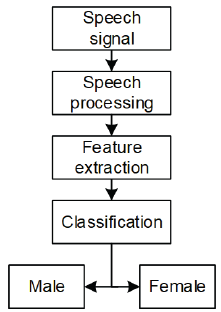


The first stage is related to defining the problem and choosing the data.
After that, it is necessary to apply data preprocessing techniques to prepare the data to feature extraction.
After the extraction of features this data is classified using a different number of classification algorithms.

## 2.1 Speech signal origin and description

The dataset is retrieved from https://github.com/jim-schwoebel/sample_voice_data.

The audio set consists of 102 gender labeled files (51 female and 51 male).

Our original sample has a sampling frequency of 16000 samples/sec.

## 2.2 Speech Processing

Natural audio signals are never available in the pure noiseless form. Therefore, every speech signal must be treated with noise reduction tools. There are several noise reduction algorithms available such as Kalman filter, LMS filter and Spectral Gating (Lotkier, S. et al, 2021).

The voiced speech of a typical adult male will have a fundamental frequency from 85 to 155 Hz, and that of a typical adult female from 165 to 255 Hz.
However, we need to account to harmonics and not only the fundamental frequency (Traunmüller, H. and Eriksson, A, 1995).

Because of this, although speech typically covers frequencies from 30 to 10,000 Hz, most of the energy is in the range from 200 to 3500 Hz (Sobolewski, 2003).

In this way, two different approaches are taken to filter our signal.
In the first approach the spectral gating is applied.
Another approach is to filter our signal to the frequencies described above. This aims to remove any possible noise that could exist in the data not related to speech. Specifically, the desired (or actual) speech is limited by the ending point of the passband frequency, and the unwanted noise is limited by the starting point of the stopband frequency.


###2.2.1 Spectral gating

Spectral Gating Algorithm is an uncommon filter effect that is used as a tool for creating sound design.

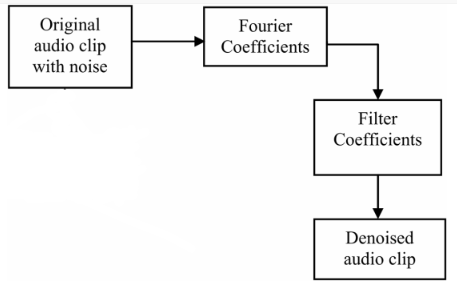

It divides the incoming signal into two frequency ranges one above and another below a center frequency band that you specify with center frequency and bandwidth parameters. The signal ranges which are above and below the defined band can be individually processed with the low level and high-level parameters(Lotliker, S. et al. 2021).

This method is applied using noisereduce library.

###2.2.2 The Butterworth filter

A Butterworth filter is used to filter out occurring frequencies which don't belong to the human vocal spectrum, since it is a well-known signal processing filter and designed to have a system frequency response to be flat as much as possible within the passband region (Oppenheim, A. and Schafer, R., 2009).


This method is applied using scipy signal library.

To determine the order of the filter the gain over time for several orders is plotted. The order of 10 shows the best flat line in the passband region, without any ripples.



## 2.3 Feature Extraction

Features to be extracted are determined by bibliographic research and comparison between scientifical articles on the subsject of speach recognition and classification.

Both features from time and frequency-domain  were extracted.
Fast Fourier Transform (FFT) was appliedto extract the frequency-domain features. 

The main features are described below.


### 2.3.1 Time-domain features

**Fundamental frequencies** : 

It is measured by time domain periodicity of signal. In human voice or musical instruments, it is non-trivial to measure the fundamental frequency due to the
variations in waveform periods and due to other stronger harmonics. Autocorrelation function is used to find the periodicity of signal. (Darji, M., 2017)
<br><br>

**Peak to peak**:

The difference between the highest and the lowest values in a waveform. 
<br><br>

**Root mean sqare (RMS)**:

The root-mean-square value of a signal, also known as the quadratic mean. It represents the average power of a signal. It is only related to the signal's amplitude.
<br><br>

**Crast factor**:

The difference in decibels between the peak and average levels of a signal.
<br><br>

**Form factor**:

It is the ratio of the RMS value to the average value.
<br><br>

**Pulse indicator factor**:

<br><br>

### 2.3.2 Frequncy-domain features

**Pitch**:

It is a perceptual property of sounds that allows their ordering on a frequency-related scale, or more commonly, pitch is the quality that makes it possible to judge sounds as "higher" and "lower" in the sense associated with musical melodies. Pitch is defined as the fundamental frequency of the excitation source. (Darji, M., 2017)
<br><br>

**Root mean sqare (RMS)**:

The root-mean-square value of a signal, also known as the quadratic mean. It represents the average power of a signal. It is only related to the signal's amplitude.
<br><br>

**Chroma**:

It is known two distinct attributes of pitch perception, tone height and chroma. Tone height describes the general increase in the pitch of a sound as its frequency increases. Chroma, on the other hand, is cyclic in nature with octave periodicity. Under this formulation two tones separated by an integral number of octaves share the same value of chroma. (Bartsch, M. and Wakefield, H., 2001)
<br><br>


**Mel-Frequency Cepstral Coefficients (MFCC)**: 

MFCC are perceptually motivated features that provide a compact representation of the short-time spectrum envelope (Darji, M., 2017).
<br><br>


##2.4 Classification 

For classification of the audio records, several different algorithms are used aiming to obtain the best model.
The chosen techniques are described below.


### 2.4.1 Support Vector Machine (SVM)

SVMs were originally designed for regression and binary classiﬁcation tasks.
When applied to binary classiﬁcation tasks, the SVM learning algorithm looks
for classiﬁcation models that combine high predictive accuracy and low model
complexity. To this end, training objects from diﬀerent classes are selected to
be support vectors. These vectors deﬁne a decision border able to maximize
the separation margin between the border and the objects of the two classes (Moreira, J. et al, 2019).

### 2.4.2 Logistic Regression

This algorithm estimates the probability of an object belonging to a class. For such, it adjusts a logistic function to a training data set. This logistic function generates a straight line separating the objects of the two classes (Moreira, J. et al, 2019).

###2.4.3 Decision Tree

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.
Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels (Moreira, J. et al, 2019).

###2.4.4 Extreme Gradient Boost (XGBoost)

This algorithm consists of  parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems. (Moreira, J. et al, 2019).

#3. Data preprocessing

##3.1 Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fft
import sklearn
from scipy.io import wavfile
import scipy.io
import os
from scipy import signal
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")
     


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [3]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal = '/content/drive/MyDrive/signal processing/males/'

fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([mal+x for x in os.listdir(mal)])

Creating an array with the filepaths to the different samples for men and women.

In [4]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate (in samples/sec), data
maudios = np.array([wavfile.read(wav_mname)for wav_mname in mals]) # samplerate (in samples/sec), data

Converting the waveforms to arrays which can be used to manipulate the data.

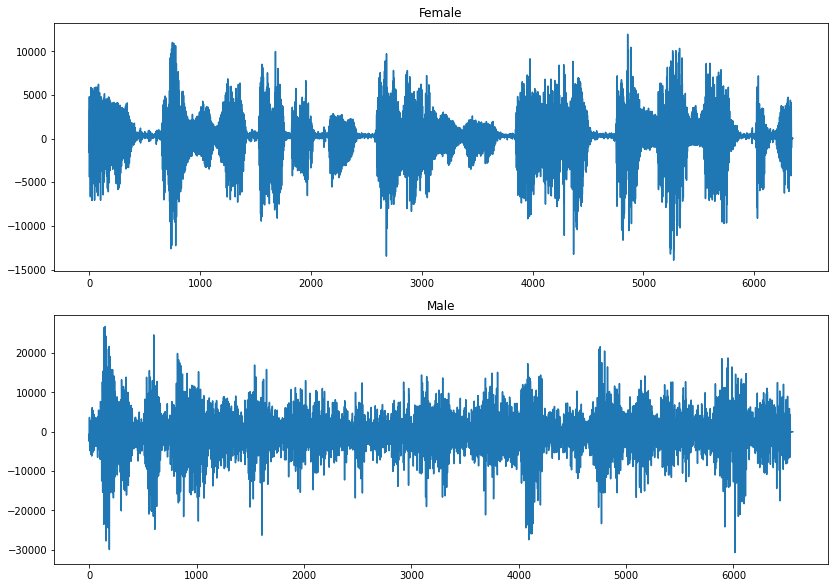

In [5]:
#@title
fig, ax = plt.subplots(2,1, figsize = (11.7, 8.27))
sns.lineplot(data = faudios[0][1][0::10], ax= ax[0])
ax[0].set_title('Female')
sns.lineplot(data = maudios[0][1][0::10], ax = ax[1])
ax[1].set_title('Male')
plt.tight_layout()

In [6]:
print('Shape faudio: ',faudios.shape)
print('Shape maudio: ',maudios.shape)

Shape faudio:  (51, 2)
Shape maudio:  (51, 2)


2 times 51 files, monochannel

##3.2 Reducing noise

In [ ]:
# !pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import noisereduce as nr

In [ ]:
# #f_data = faudios[:,1]
# #m_data = maudios[:,1]
# f_data = np.array([nr.reduce_noise(x[1], sr = 16000) for x in faudios])
# m_data = np.array([nr.reduce_noise(x[1], sr = 16000) for x in maudios])

Noise reduction is experimented, however that conclusion is that better results are achieved using Butterword filter.

## 3.3 Filtering data

In [9]:
f_data = []
m_data = []

for i in faudios:
  f_data.append(i[1])

for i in maudios:
  m_data.append(i[1])

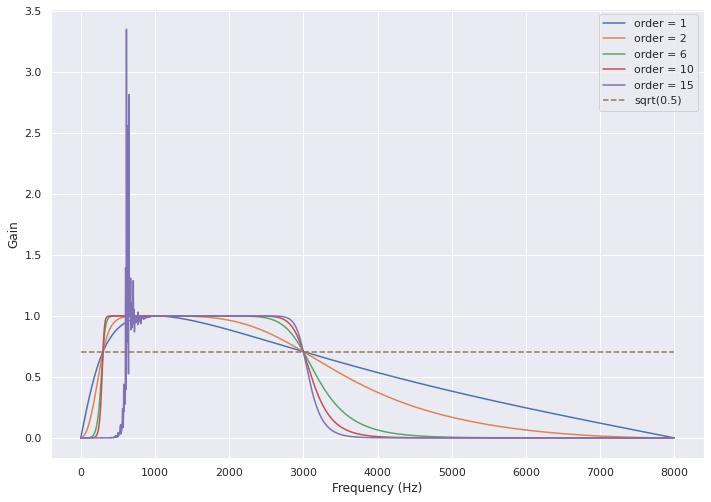

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for order in [1, 2, 6, 10, 15]:
  fs = 16000
  h_cut = 3000
  l_cut= 300
  b, a = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs)
  w, h = signal.freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.rcParams["figure.figsize"] = (11.7, 8.27)
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.show()

The order of 10 shows the best flat line in the passband region, without any ripples.

In [11]:
order = 10
fs = 16000
h_cut = 3500
l_cut= 200

filtered_f=[]
filtered_m = []


for data in f_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_f.append(y)

for data in m_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_m.append(y)


wn = Audio(y, rate=16000, autoplay=False) # hear the last audio
display(wn)

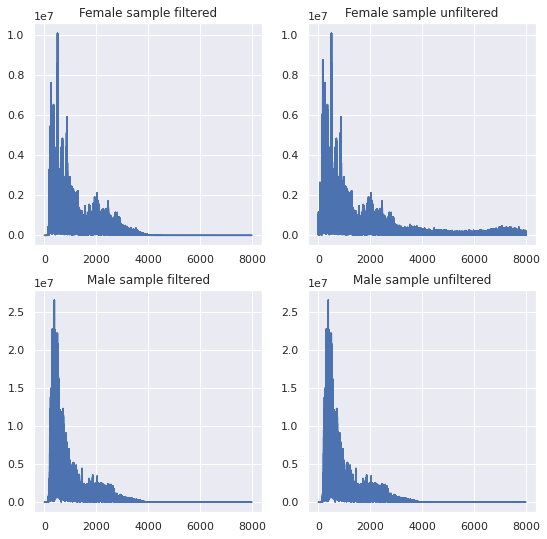

In [12]:
# plotting before and after for verification
rand = np.random.randint(0, len(f_data))
y_f1 = filtered_f[rand]
y_f2 = f_data[rand]
y_m1 = filtered_m[rand]
y_m2 = m_data[rand]

yf1 = fft.fft(y_f1)
yf2 = fft.fft(y_f2)
ym1 = fft.fft(y_m1)
ym2 = fft.fft(y_m2)

xf1 = fft.fftfreq(len(yf1), 1 / fs)
xf2 = fft.fftfreq(len(yf2), 1 / fs)
xm1 = fft.fftfreq(len(ym1), 1 / fs)
xm2 = fft.fftfreq(len(ym2), 1 / fs)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(abs(xf1), np.abs(yf1))
plt.title('Female sample filtered')
plt.subplot(2, 2, 2)
plt.plot(abs(xf2), np.abs(yf2))
plt.title('Female sample unfiltered')
plt.subplot(2, 2, 3)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Male sample filtered')
plt.subplot(2, 2, 4)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Male sample unfiltered')


plt.show()

Quick visualisation in order to compare filtered and unfiltered frequencies for men and women

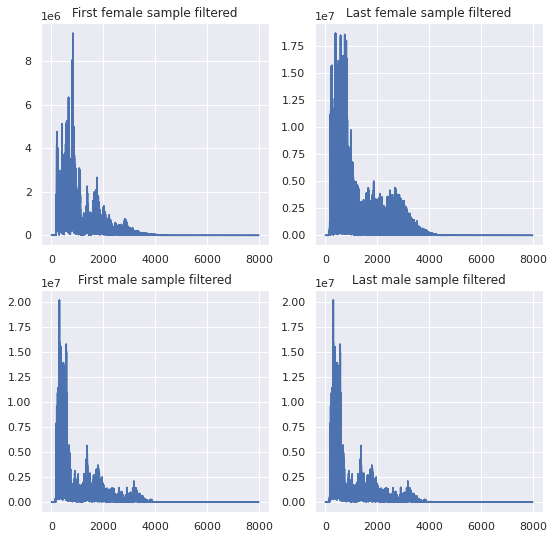

In [13]:
# plotting first and last sample for verification

y_f1 = filtered_f[0]
y_f2 = filtered_f[-1]
y_m1 = filtered_m[0]
y_m2 = filtered_m[-1]

yf1 = fft.fft(y_f1)
yf2 = fft.fft(y_f2)
ym1 = fft.fft(y_m1)
ym2 = fft.fft(y_m2)

xf1 = fft.fftfreq(len(yf1), 1 / fs)
xf2 = fft.fftfreq(len(yf2), 1 / fs)
xm1 = fft.fftfreq(len(ym1), 1 / fs)
xm2 = fft.fftfreq(len(ym2), 1 / fs)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(abs(xf1), np.abs(yf1))
plt.title('First female sample filtered')
plt.subplot(2, 2, 2)
plt.plot(abs(xf2), np.abs(yf2))
plt.title('Last female sample filtered')
plt.subplot(2, 2, 3)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('First male sample filtered')
plt.subplot(2, 2, 4)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Last male sample filtered')


plt.show()

##3.4 Extracting features

In [18]:
def extract_feature(X, sample_rate, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    #X, sample_rate = librosa.core.load(file_name)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))
    return result

In [22]:
import scipy.stats as stats

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','SKEW',
            'KURTOSIS','P2P','CREST_FACTOR', 'FORM_FACTOR', 'PULSE_INDICATOR',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f',
            'MFCC', 'CHROMA', 'CONTRAST']

def features_extraction(df):

    df_features_list = []

    for i in range(len(df)):
      X = df[i]
      df_features = []
     
      ## TIME DOMAIN ##

      df_features.append(np.min(X))
      df_features.append(np.max(X))
      df_features.append(np.mean(X))
      df_features.append(np.sqrt(np.mean(X**2)))
      df_features.append(np.var(X))
      df_features.append(np.std(X))
      df_features.append(np.mean(X**2))
      df_features.append(np.max(np.abs(X)))
      df_features.append(np.ptp(X))
      df_features.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      df_features.append(np.sqrt(np.mean(X**2))/np.mean(X))
      df_features.append(np.max(np.abs(X))/np.mean(X))

      ## FREQ DOMAIN ##
      ft = fft.fft(X)
      S = np.abs(ft**2)/len(X)
      df_features.append(np.max(S))
      df_features.append(np.sum(S))
      df_features.append(np.mean(S))
      df_features.append(np.var(S))
      
      df_features.append(np.max(np.abs(S)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      df_features.append(np.mean(extract_feature(X, 16000, mfcc = True)))
      df_features.append(np.mean(extract_feature(X, 16000, chroma = True)))
      df_features.append(np.mean(extract_feature(X, 16000, contrast = True)))
      #df_features.append(np.mean(extract_feature(X, 16000, mfcc = True)))
      #Create dataframe from features
      df_features_list.append(df_features)

    return df_features_list

TALK ABOUT USED FEATURES HERE

### 3.3.1 Extracting features from female audio

In [23]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.signal import find_peaks

In [24]:
features = features_extraction(filtered_f)
features_list = np.array(features)
df_features_f = pd.DataFrame(columns = [FEATURES], data = features_list)
df_features_f

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,MFCC,CHROMA,CONTRAST
0,-15309.882891,16372.554562,8.275154e-02,2771.917030,7.683524e+06,2771.917029,7.683524e+06,16372.554562,31682.437453,5.906582,...,1.356501e+09,4.878116e+11,7.683524e+06,1.232107e+15,1.356501e+09,-0.112412,3.127471,13.268612,0.445147,30.137726
1,-15751.048143,18285.041445,2.611572e-05,3044.778922,9.270679e+06,3044.778922,9.270679e+06,18285.041445,34036.089589,6.005376,...,1.330528e+09,6.835086e+11,9.270679e+06,1.620299e+15,1.330528e+09,0.063333,2.007327,13.734767,0.519711,28.859780
2,-22516.010158,25040.848392,1.334058e-02,5776.555669,3.336860e+07,5776.555669,3.336860e+07,25040.848392,47556.858550,4.334910,...,5.063673e+09,2.186844e+12,3.336860e+07,3.857502e+16,5.063673e+09,0.058232,1.506614,14.864376,0.458396,28.239588
3,-5566.298991,4491.894498,-9.869092e-07,682.300284,4.655337e+05,682.300284,4.655337e+05,5566.298991,10058.193490,8.158137,...,1.696637e+08,3.527628e+10,4.655337e+05,1.204102e+13,1.696637e+08,-0.653972,5.615900,10.134822,0.551766,28.576628
4,-12408.045042,12231.221502,-4.993330e-05,675.071108,4.557210e+05,675.071108,4.557210e+05,12408.045042,24639.266544,18.380353,...,4.717127e+07,7.979857e+10,4.557210e+05,2.938268e+12,4.717127e+07,-0.471962,49.022076,10.541128,0.677754,25.914537
5,-14334.222427,10287.489096,-7.593479e-03,1283.863104,1.648304e+06,1283.863104,1.648304e+06,14334.222427,24621.711523,11.164915,...,2.203713e+08,2.903126e+11,1.648304e+06,4.717658e+13,2.203713e+08,-0.311099,11.195834,12.602469,0.520776,29.080836
6,-16736.198126,11330.171795,1.423662e-03,1851.297694,3.427303e+06,1851.297694,3.427303e+06,16736.198126,28066.369921,9.040252,...,4.278520e+08,2.948029e+11,3.427303e+06,1.972022e+14,4.278520e+08,-0.197747,5.569346,13.062787,0.492787,30.923736
7,-1729.969231,1963.979221,1.410734e-02,515.272517,2.655058e+05,515.272517,2.655058e+05,1963.979221,3693.948452,3.811535,...,3.072806e+07,1.685643e+10,2.655058e+05,1.343087e+12,3.072806e+07,0.211806,0.387991,8.693155,0.385600,30.144586
8,-12781.859406,10509.667094,-4.567346e-04,1683.298679,2.833494e+06,1683.298679,2.833494e+06,12781.859406,23291.526501,7.593340,...,7.149282e+08,4.381262e+11,2.833494e+06,2.245664e+14,7.149282e+08,-0.153227,5.106983,12.911639,0.510823,28.058322
9,-11558.972320,10633.537438,-8.207982e-05,1241.134017,1.540414e+06,1241.134017,1.540414e+06,11558.972320,22192.509758,9.313235,...,1.979358e+08,1.135716e+11,1.540414e+06,3.661584e+13,1.979358e+08,-0.293235,8.506920,11.297350,0.531324,27.561546


In [25]:
def get_pitch(data_list, sampling_frequency):

  pitch_df = []
  for data in data_list:
    
    # Get some useful statistics
    T = 1/sampling_frequency # Sampling period
    N = len(data) # Signal length in samples
    t = N / sampling_frequency # Signal length in seconds
    Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
    Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
    Pxx = np.abs(Y_k) # Power spectrum

    f = sampling_frequency * np.arange((N/2)) / N; # frequencies
    auto = sm.tsa.acf(data, nlags=2000)
    peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
    lag = peaks[0] # Choose the first peak as our pitch component lag
    pitch = sampling_frequency / lag # Transform lag into frequency
    pitch_df.append(pitch)

  return pitch_df

In [26]:
result_f = get_pitch(filtered_f, fs)

In [27]:
label_fem = [1] * len(df_features_f)
df_features_f.insert(21, "Pitch", result_f, True)
df_features_f.insert(22, "Label", label_fem, True)
df_features_f

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,Label,MFCC,CHROMA,CONTRAST
0,-15309.882891,16372.554562,8.275154e-02,2771.917030,7.683524e+06,2771.917029,7.683524e+06,16372.554562,31682.437453,5.906582,...,7.683524e+06,1.232107e+15,1.356501e+09,-0.112412,3.127471,800.000000,1,13.268612,0.445147,30.137726
1,-15751.048143,18285.041445,2.611572e-05,3044.778922,9.270679e+06,3044.778922,9.270679e+06,18285.041445,34036.089589,6.005376,...,9.270679e+06,1.620299e+15,1.330528e+09,0.063333,2.007327,592.592593,1,13.734767,0.519711,28.859780
2,-22516.010158,25040.848392,1.334058e-02,5776.555669,3.336860e+07,5776.555669,3.336860e+07,25040.848392,47556.858550,4.334910,...,3.336860e+07,3.857502e+16,5.063673e+09,0.058232,1.506614,761.904762,1,14.864376,0.458396,28.239588
3,-5566.298991,4491.894498,-9.869092e-07,682.300284,4.655337e+05,682.300284,4.655337e+05,5566.298991,10058.193490,8.158137,...,4.655337e+05,1.204102e+13,1.696637e+08,-0.653972,5.615900,888.888889,1,10.134822,0.551766,28.576628
4,-12408.045042,12231.221502,-4.993330e-05,675.071108,4.557210e+05,675.071108,4.557210e+05,12408.045042,24639.266544,18.380353,...,4.557210e+05,2.938268e+12,4.717127e+07,-0.471962,49.022076,888.888889,1,10.541128,0.677754,25.914537
5,-14334.222427,10287.489096,-7.593479e-03,1283.863104,1.648304e+06,1283.863104,1.648304e+06,14334.222427,24621.711523,11.164915,...,1.648304e+06,4.717658e+13,2.203713e+08,-0.311099,11.195834,571.428571,1,12.602469,0.520776,29.080836
6,-16736.198126,11330.171795,1.423662e-03,1851.297694,3.427303e+06,1851.297694,3.427303e+06,16736.198126,28066.369921,9.040252,...,3.427303e+06,1.972022e+14,4.278520e+08,-0.197747,5.569346,666.666667,1,13.062787,0.492787,30.923736
7,-1729.969231,1963.979221,1.410734e-02,515.272517,2.655058e+05,515.272517,2.655058e+05,1963.979221,3693.948452,3.811535,...,2.655058e+05,1.343087e+12,3.072806e+07,0.211806,0.387991,615.384615,1,8.693155,0.385600,30.144586
8,-12781.859406,10509.667094,-4.567346e-04,1683.298679,2.833494e+06,1683.298679,2.833494e+06,12781.859406,23291.526501,7.593340,...,2.833494e+06,2.245664e+14,7.149282e+08,-0.153227,5.106983,615.384615,1,12.911639,0.510823,28.058322
9,-11558.972320,10633.537438,-8.207982e-05,1241.134017,1.540414e+06,1241.134017,1.540414e+06,11558.972320,22192.509758,9.313235,...,1.540414e+06,3.661584e+13,1.979358e+08,-0.293235,8.506920,842.105263,1,11.297350,0.531324,27.561546


### 3.3.2 Extracting features from male audio

In [28]:
features = features_extraction(filtered_m)
features_list = np.array(features)
df_features_m = pd.DataFrame(columns = [FEATURES], data = features_list)
df_features_m

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,MFCC,CHROMA,CONTRAST
0,-32154.132909,34395.837540,4.380265e-02,5034.686205,2.534807e+07,5034.686204,2.534807e+07,34395.837540,66549.970449,6.831774,...,6.231335e+09,1.661211e+12,2.534807e+07,2.069311e+16,6.231335e+09,0.107407,2.432433,14.818610,0.636795,27.109115
1,-28484.752177,30943.420605,1.970472e-03,4824.897973,2.327964e+07,4824.897973,2.327964e+07,30943.420605,59428.172781,6.413280,...,4.337684e+09,1.930906e+12,2.327964e+07,1.478222e+16,4.337684e+09,0.049908,2.443959,14.030258,0.591903,26.599627
2,-3374.757764,3358.060819,-1.659962e-06,589.515198,3.475282e+05,589.515198,3.475282e+05,3374.757764,6732.818583,5.724632,...,5.847053e+07,3.985731e+10,3.475282e+05,2.998858e+12,5.847053e+07,0.069722,3.319447,9.521919,0.577507,27.625834
3,-28625.822604,35411.777087,-4.835408e-05,5955.815812,3.547174e+07,5955.815812,3.547174e+07,35411.777087,64037.599691,5.945748,...,6.120722e+09,2.360999e+12,3.547174e+07,3.678075e+16,6.120722e+09,0.135134,3.628041,14.883574,0.557233,27.897976
4,-8896.781681,10359.995192,5.353319e-05,1487.823246,2.213618e+06,1487.823246,2.213618e+06,10359.995192,19256.776873,6.963189,...,3.761287e+08,1.518719e+11,2.213618e+06,1.160048e+14,3.761287e+08,-0.241358,3.663015,12.378317,0.664513,26.905093
5,-23598.695034,25106.647023,-1.016236e-03,4344.840147,1.887764e+07,4344.840147,1.887764e+07,25106.647023,48705.342058,5.778497,...,4.013585e+09,1.411141e+12,1.887764e+07,1.665306e+16,4.013585e+09,0.128932,2.190515,14.206122,0.380451,28.736869
6,-9705.953049,10259.403737,-3.524591e-04,1042.157003,1.086091e+06,1042.157003,1.086091e+06,10259.403737,19965.356786,9.844394,...,2.024764e+08,9.453338e+10,1.086091e+06,2.941799e+13,2.024764e+08,0.033618,9.166013,12.054990,0.602100,28.774424
7,-37814.480350,44143.041513,-2.973428e-04,7935.827193,6.297735e+07,7935.827193,6.297735e+07,44143.041513,81957.521863,5.562500,...,1.304306e+10,7.093769e+12,6.297735e+07,1.333968e+17,1.304306e+10,0.129623,2.783333,15.254223,0.537701,28.573636
8,-8201.046297,10664.802965,-3.492636e-02,1250.170175,1.562925e+06,1250.170175,1.562925e+06,10664.802965,18865.849261,8.530681,...,3.463222e+08,9.922701e+10,1.562925e+06,8.436931e+13,3.463222e+08,0.168520,6.499037,12.146131,0.586241,27.071301
9,-5756.039635,5458.350419,5.054349e-03,1161.987930,1.350216e+06,1161.987930,1.350216e+06,5756.039635,11214.390054,4.953614,...,2.450771e+08,9.263562e+10,1.350216e+06,6.505931e+13,2.450771e+08,-0.069452,1.960649,10.850746,0.552562,29.213289


In [30]:
result_m = get_pitch(filtered_m, fs)

In [31]:
label_mal = [0] * len(df_features_m)
df_features_m.insert(21, "Pitch", result_m, True)
df_features_m.insert(22, "Label", label_mal, True)
df_features_m

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,Label,MFCC,CHROMA,CONTRAST
0,-32154.132909,34395.837540,4.380265e-02,5034.686205,2.534807e+07,5034.686204,2.534807e+07,34395.837540,66549.970449,6.831774,...,2.534807e+07,2.069311e+16,6.231335e+09,0.107407,2.432433,457.142857,0,14.818610,0.636795,27.109115
1,-28484.752177,30943.420605,1.970472e-03,4824.897973,2.327964e+07,4824.897973,2.327964e+07,30943.420605,59428.172781,6.413280,...,2.327964e+07,1.478222e+16,4.337684e+09,0.049908,2.443959,410.256410,0,14.030258,0.591903,26.599627
2,-3374.757764,3358.060819,-1.659962e-06,589.515198,3.475282e+05,589.515198,3.475282e+05,3374.757764,6732.818583,5.724632,...,3.475282e+05,2.998858e+12,5.847053e+07,0.069722,3.319447,500.000000,0,9.521919,0.577507,27.625834
3,-28625.822604,35411.777087,-4.835408e-05,5955.815812,3.547174e+07,5955.815812,3.547174e+07,35411.777087,64037.599691,5.945748,...,3.547174e+07,3.678075e+16,6.120722e+09,0.135134,3.628041,551.724138,0,14.883574,0.557233,27.897976
4,-8896.781681,10359.995192,5.353319e-05,1487.823246,2.213618e+06,1487.823246,2.213618e+06,10359.995192,19256.776873,6.963189,...,2.213618e+06,1.160048e+14,3.761287e+08,-0.241358,3.663015,640.000000,0,12.378317,0.664513,26.905093
5,-23598.695034,25106.647023,-1.016236e-03,4344.840147,1.887764e+07,4344.840147,1.887764e+07,25106.647023,48705.342058,5.778497,...,1.887764e+07,1.665306e+16,4.013585e+09,0.128932,2.190515,615.384615,0,14.206122,0.380451,28.736869
6,-9705.953049,10259.403737,-3.524591e-04,1042.157003,1.086091e+06,1042.157003,1.086091e+06,10259.403737,19965.356786,9.844394,...,1.086091e+06,2.941799e+13,2.024764e+08,0.033618,9.166013,640.000000,0,12.054990,0.602100,28.774424
7,-37814.480350,44143.041513,-2.973428e-04,7935.827193,6.297735e+07,7935.827193,6.297735e+07,44143.041513,81957.521863,5.562500,...,6.297735e+07,1.333968e+17,1.304306e+10,0.129623,2.783333,432.432432,0,15.254223,0.537701,28.573636
8,-8201.046297,10664.802965,-3.492636e-02,1250.170175,1.562925e+06,1250.170175,1.562925e+06,10664.802965,18865.849261,8.530681,...,1.562925e+06,8.436931e+13,3.463222e+08,0.168520,6.499037,727.272727,0,12.146131,0.586241,27.071301
9,-5756.039635,5458.350419,5.054349e-03,1161.987930,1.350216e+06,1161.987930,1.350216e+06,5756.039635,11214.390054,4.953614,...,1.350216e+06,6.505931e+13,2.450771e+08,-0.069452,1.960649,551.724138,0,10.850746,0.552562,29.213289


### 3.3.3 Merging both female and male feature dfs

In [32]:
df_features = df_features_f.append(df_features_m)
df_features 

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,Label,MFCC,CHROMA,CONTRAST
0,-15309.882891,16372.554562,8.275154e-02,2771.917030,7.683524e+06,2771.917029,7.683524e+06,16372.554562,31682.437453,5.906582,...,7.683524e+06,1.232107e+15,1.356501e+09,-0.112412,3.127471,800.000000,1,13.268612,0.445147,30.137726
1,-15751.048143,18285.041445,2.611572e-05,3044.778922,9.270679e+06,3044.778922,9.270679e+06,18285.041445,34036.089589,6.005376,...,9.270679e+06,1.620299e+15,1.330528e+09,0.063333,2.007327,592.592593,1,13.734767,0.519711,28.859780
2,-22516.010158,25040.848392,1.334058e-02,5776.555669,3.336860e+07,5776.555669,3.336860e+07,25040.848392,47556.858550,4.334910,...,3.336860e+07,3.857502e+16,5.063673e+09,0.058232,1.506614,761.904762,1,14.864376,0.458396,28.239588
3,-5566.298991,4491.894498,-9.869092e-07,682.300284,4.655337e+05,682.300284,4.655337e+05,5566.298991,10058.193490,8.158137,...,4.655337e+05,1.204102e+13,1.696637e+08,-0.653972,5.615900,888.888889,1,10.134822,0.551766,28.576628
4,-12408.045042,12231.221502,-4.993330e-05,675.071108,4.557210e+05,675.071108,4.557210e+05,12408.045042,24639.266544,18.380353,...,4.557210e+05,2.938268e+12,4.717127e+07,-0.471962,49.022076,888.888889,1,10.541128,0.677754,25.914537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,-9348.319512,10018.899208,-8.197055e-04,1508.189275,2.274635e+06,1508.189275,2.274635e+06,10018.899208,19367.218720,6.642999,...,2.274635e+06,1.422406e+14,3.258452e+08,0.022419,2.826796,516.129032,0,11.592402,0.521310,28.143081
47,-5405.086114,5089.582036,1.327184e-07,605.735826,3.669159e+05,605.735826,3.669159e+05,5405.086114,10494.668151,8.923174,...,3.669159e+05,4.402457e+12,8.591514e+07,-0.126862,8.961417,470.588235,0,10.518085,0.631021,26.499390
48,-6371.981905,6753.554075,-2.489452e-06,1116.198531,1.245899e+06,1116.198531,1.245899e+06,6753.554075,13125.535980,6.050495,...,1.245899e+06,6.768052e+13,4.832389e+08,0.141063,4.489889,457.142857,0,10.426765,0.645117,27.053774
49,-40812.687201,40947.176233,4.666826e-06,6445.686155,4.154687e+07,6445.686155,4.154687e+07,40947.176233,81759.863434,6.352648,...,4.154687e+07,3.864661e+16,7.079320e+09,0.162677,5.647055,432.432432,0,15.477089,0.603452,27.077741


In [ ]:
df_features.to_csv('/content/drive/MyDrive/signal processing/features.csv')

In [33]:
df_features.dtypes

MIN                float64
MAX                float64
MEAN               float64
RMS                float64
VAR                float64
STD                float64
POWER              float64
PEAK               float64
SKEW               float64
KURTOSIS           float64
P2P                float64
CREST_FACTOR       float64
FORM_FACTOR        float64
PULSE_INDICATOR    float64
MAX_f              float64
SUM_f              float64
MEAN_f             float64
VAR_f              float64
PEAK_f             float64
SKEW_f             float64
KURTOSIS_f         float64
Pitch              float64
Label                int64
MFCC               float64
CHROMA             float64
CONTRAST           float64
dtype: object

## 3.4 Feature visualization

# 4. Machine Learning Algorithms

In [34]:
df = df_features
df.describe()

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,KURTOSIS,...,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,Label,MFCC,CHROMA,CONTRAST
count,102.000000,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000,...,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-15264.395090,15031.492701,-6.796949e-03,2286.119869,8.509766e+06,2286.119869,8.509766e+06,16031.162235,30295.887791,7.808135,...,8.509766e+06,7.693427e+15,1.817337e+09,-0.046390,6.157942,779.125934,0.500000,12.308904,0.551288,28.188781
std,9899.652104,10033.535361,5.866740e-02,1820.969814,1.290860e+07,1820.969814,1.290860e+07,10473.581073,19759.524167,2.475229,...,1.290860e+07,1.950585e+16,3.028965e+09,0.209017,5.683131,516.335870,0.502469,1.822492,0.066102,1.204078
min,-40812.687201,1547.703953,-5.697748e-01,174.803207,3.055616e+04,174.803207,3.055616e+04,1547.703953,2977.149685,3.811535,...,3.055616e+04,1.470981e+10,2.922506e+06,-0.670135,0.387991,271.186441,0.000000,6.995974,0.376487,25.914537
25%,-23098.878694,7471.006459,-4.953850e-05,1044.611786,1.091232e+06,1044.611786,1.091232e+06,7641.649440,14820.661438,5.870566,...,1.091232e+06,2.878580e+13,1.944240e+08,-0.145098,3.030491,504.032258,0.000000,11.033374,0.512328,27.306386
50%,-12573.519010,11323.043922,-2.451267e-07,1579.542890,2.495652e+06,1579.542890,2.495652e+06,12573.519010,23757.174535,7.633184,...,2.495652e+06,1.589073e+14,4.687795e+08,-0.010667,4.986708,615.384615,0.500000,12.371945,0.554464,28.140894
75%,-7229.352914,20512.340899,4.366508e-05,2802.322721,7.853321e+06,2802.322721,7.853321e+06,23599.198437,43853.883264,8.928946,...,7.853321e+06,1.810583e+15,1.725256e+09,0.111245,7.542174,831.578947,1.000000,13.605891,0.598538,28.848479
max,-1429.445732,44143.041513,8.275154e-02,7935.827193,6.297735e+07,7935.827193,6.297735e+07,44143.041513,81957.521863,18.380353,...,6.297735e+07,1.333968e+17,1.769113e+10,0.319625,49.022076,3200.000000,1.000000,15.697260,0.688197,32.631301


In [35]:
from sklearn import preprocessing
df = pd.read_csv('/content/drive/MyDrive/signal processing/features.csv')
df = df.sample(frac = 1)
X = df
y = X.pop('Label')
scaled_X = pd.DataFrame(preprocessing.normalize(X, axis = 0), columns=X.columns)
scaled_X.head()

,Unnamed: 0,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,...,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,MFCC,CHROMA,MEL,CONTRAST
0,0.013652,-0.097611,0.096726,-1.173100e-05,0.038060,0.007849,0.038060,0.007849,0.093889,0.097425,...,0.007849,0.000120,0.003044,-0.090238,0.576665,0.064082,0.088551,0.100649,0.007694,0.085013
1,0.003413,-0.208014,0.206530,7.145677e-04,0.180586,0.176696,0.180586,0.176696,0.200084,0.207816,...,0.176696,0.116663,0.161292,0.030331,0.062168,0.054927,0.133465,0.111696,0.182556,0.097839
2,0.153583,-0.065269,0.064333,-7.243123e-05,0.068712,0.025581,0.068712,0.025581,0.062781,0.064974,...,0.025581,0.001814,0.017668,0.006982,0.034459,0.076898,0.101448,0.102818,0.024710,0.095107
3,0.044368,-0.039943,0.041260,-2.035044e-05,0.025796,0.003606,0.025796,0.003606,0.038750,0.040698,...,0.003606,0.000023,0.002473,-0.083532,0.078688,0.104861,0.075231,0.094107,0.003364,0.098974
4,0.143344,-0.100206,0.090017,-2.948431e-07,0.075903,0.031216,0.075903,0.031216,0.096386,0.095418,...,0.031216,0.000767,0.007447,-0.169764,0.080071,0.192246,0.095070,0.083867,0.022214,0.099886


First the data was shuffled. We proceeded by splitting the features from the target variable so they can be used in different models. We decided to use leave-one-out cross validation to evaluate our models. This decision was made because of the small amount of data. This disables us from testing our models using the more common train test split.

SVM

In [37]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import svm

model_svm = svm.SVC()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_svm, X, y, cv = kf)
print(np.mean(score))

0.00980392156862745


In [38]:
model_svm = svm.SVC()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_svm, scaled_X, y, cv = kf)
print(np.mean(score))     

0.5784313725490197


Logistic Regression

In [39]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_lr, X, y, cv = kf)
print(np.mean(score))

0.5


Decision Tree Classification

In [40]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_tree, X, y, cv = kf, scoring = 'accuracy')
print(np.mean(score))

0.7058823529411765


In [41]:
model_tree = model_tree.fit(X, y)
importance = model_tree.feature_importances_
importance = pd.DataFrame(importance,columns = ['Weight'], index = X.columns)
importance = importance.sort_values('Weight', ascending = False).drop(importance[importance['Weight'] == 0].index)
importance

,Weight
Pitch,0.361373
CHROMA,0.228352
CREST_FACTOR,0.109804
FORM_FACTOR,0.052288
KURTOSIS,0.037037
SUM_f,0.036601
PULSE_INDICATOR,0.034638
MFCC,0.033422
STD,0.026419
POWER,0.026144


XGBoost Classification

In [ ]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_XGB, X, y, cv = kf, scoring = 'accuracy')
print(np.mean(score))

0.7450980392156863


In [ ]:
mocel_XGB = model_XGB.fit(X,y)
importance = model_XGB.feature_importances_
importance = pd.DataFrame(importance,columns = ['Weight'], index = X.columns)
importance = importance.sort_values('Weight', ascending = False).drop(importance[importance['Weight'] == 0].index)
importance

,Weight
Pitch,0.219043
CHROMA,0.151259
CREST_FACTOR,0.072838
MFCC,0.061081
KURTOSIS,0.059483
CONTRAST,0.056700
FORM_FACTOR,0.048265
MAX_f,0.047833
VAR_f,0.046301
RMS,0.045751


It can be seen that XGBoost returns the best accuracy, additionally it is very apparant that not all features are important when trying to predict the class. The importance of features in XGBoost is very simmilar to the ones from the decision tree.

# 5. Results and Conclusions

Discussion here

#6. References

1.   John S. Sobolewski, "Data Transmission Media", Editor(s): Robert A. Meyers,Encyclopedia of Physical Science and Technology (Third Edition), Academic Press,
2003, Pages 277-303, ISBN 9780122274107, https://doi.org/10.1016/B0-12-227410-5/00165-4. (https://www.sciencedirect.com/science/article/pii/B0122274105001654)

2. A. Majkowski, M. Kołodziej, J. Pyszczak, P. Tarnowski and R. J. Rak, "Identification of Gender Based on Speech Signal," 2019 IEEE 20th International Conference on Computational Problems of Electrical Engineering (CPEE), 2019, pp. 1-4, doi: 10.1109/CPEE47179.2019.8949078.

3.   S. Jadav, "Voice-Based Gender Identification Using Machine Learning," 2018 4th International Conference on Computing Communication and Automation (ICCCA), 2018, pp. 1-4, doi: 10.1109/CCAA.2018.8777582.

4. Ali, Md & Islam, Md & Hossain, Md Alamgir. (2012). "GENDER RECOGNITION SYSTEM USING SPEECH SIGNAL". Vol.2. 

5. Submitter, ICSMDI 2021 and Jena, Bhagyalaxmi and Mohanty, Anita and Mohanty, Subrat Kumar, "Gender Recognition and Classification of Speech Signal" (May 25, 2021). Proceedings of the International Conference on Smart Data Intelligence (ICSMDI 2021), Available at SSRN: https://ssrn.com/abstract=3852607

6. Alan V. Oppenheim and Ronald W. Schafer. 2009. "2Discrete-Time Signal Processing" (3rd. ed.). Prentice Hall Press, USA.

7. Sahar, Raz & Rao, T. & Anuradha, S. & Bendi, Srinivasa. (2021). "Performance Analysis of ML Algorithms to Detect Gender Based on Voice". 10.3233/APC210192.

8. H. Harb and Liming Chen, "Gender identification using a general audio classifier," 2003 International Conference on Multimedia and Expo. ICME '03. Proceedings (Cat. No.03TH8698), 2003, pp. II-733, doi: 10.1109/ICME.2003.1221721.

9. Rao, P. (2008). Audio signal processing. In Speech, audio, image and biomedical signal processing using neural networks (pp. 169-189). Springer, Berlin, Heidelberg.

10. João Mendes Moreira, André de Carvalho, Tomas Horvath (2019) "A General Introduction to Data Analytics" Wiley

11. Traunmüller, Hartmut & Eriksson, Anders. (1995). "The frequency range of the voice fundamental in the speech of male and female adults". 2. 

12. Darji, Mittal. (2017). "Audio Signal Processing: A Review of Audio Signal Classification Features". International Journal of Scientific Research in Computer Science, Engineering and Information Technology. 2. 227-230. 

13.  Fifty Years of Signal Processing: The IEEE Signal Processing Society and its Technologies, 1948–1998. The IEEE Signal Processing Society. 1998.

14. S. Lotliker, G. Bhatikar, A. Almeida, U. Gaude, S. Naik and V. Jog, "Podcast Hosting Using Spectral Gating And Speech Recognition Methodology," 2021 International Conference on Recent Trends on Electronics, Information, Communication & Technology (RTEICT), 2021, pp. 579-583, doi: 10.1109/RTEICT52294.2021.9573977.

15. M. A. Bartsch and G. H. Wakefield, "To catch a chorus: using chroma-based representations for audio thumbnailing," Proceedings of the 2001 IEEE Workshop on the Applications of Signal Processing to Audio and Acoustics (Cat. No.01TH8575), 2001, pp. 15-18, doi: 10.1109/ASPAA.2001.969531.


